<font size='10'>Opinions of Medical Facilities: A Regional Comparison</font><br>
<font size='6'>Companion Notebook</font>

<font size='4'>WGU MSDA Program D214 - Charles G. Rowe 006539689</font>

In [1]:
import os
import pandas as pd

directory = os.chdir("G:\My Drive\Capstone Files\Datasets")

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\charlesrowe\AppData\Local\Temp\ipykernel_20540\1295670377.py:4: SyntaxWarning: invalid escape sequence '\M'
  directory = os.chdir("G:\My Drive\Capstone Files\Datasets")


In [2]:
df = pd.read_csv("full.csv")
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'spill1', 'spill2', 'spill3', 'spill4',
       'spill5', 'spill7', 'spill7.1', 'spill8', 'state'],
      dtype='object')

In [3]:
df = df.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill7","spill7.1","spill8"])
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [4]:
num_missing_vals = df.isna().sum()
num_missing_vals

Unnamed: 0                0
Author                    7
Review Text           24593
Review Rating             0
Date                      0
Owner Answer         118403
Owner Answer Date    118403
Author Profile            0
Author Image              0
Review URL                0
label                     0
zip                       0
state                     0
dtype: int64

In [5]:
num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

24593

In [6]:
df = df.dropna(subset=['Review Text'])
df.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [7]:
num_missing_reviews = df['Review Text'].isna().sum()
num_missing_reviews

0

In [8]:
num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

101024

In [9]:
df['Owner Answer'] = df["Owner Answer"].fillna('no answer')
num_missing_replies = df['Owner Answer'].isna().sum()
num_missing_replies

0

In [10]:
df['Owner Answer Date'] = df["Owner Answer Date"].fillna('no date')
num_missing_replies = df['Owner Answer Date'].isna().sum()
num_missing_replies

0

In [11]:
df['Author'] = df["Author"].fillna('anonymous')
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

0

In [12]:
num_missing_vals = df.isna().sum()
num_missing_vals

Unnamed: 0           0
Author               0
Review Text          0
Review Rating        0
Date                 0
Owner Answer         0
Owner Answer Date    0
Author Profile       0
Author Image         0
Review URL           0
label                0
zip                  0
state                0
dtype: int64

In [13]:
df.to_csv("cleaned_full_df.csv")
df = pd.read_csv("cleaned_full_df.csv")
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
Author                object
Review Text           object
Review Rating          int64
Date                  object
Owner Answer          object
Owner Answer Date     object
Author Profile        object
Author Image          object
Review URL            object
label                 object
zip                  float64
state                 object
dtype: object

In [14]:
df2 = pd.read_csv("new_data.csv")

df2 = df2.drop(columns=["spill1","spill2","spill3","spill4","spill5","spill6","spill7"])
df2.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'state'],
      dtype='object')

In [15]:
num_missing_vals = df2.isna().sum()
num_missing_vals

Unnamed: 0              0
Author                  0
Review Text          1185
Review Rating           0
Date                    0
Owner Answer         6377
Owner Answer Date    6377
Author Profile          0
Author Image            0
Review URL              0
label                   0
zip                     0
state                   0
dtype: int64

In [16]:
num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

1185

In [17]:
df2 = df2.dropna(subset=['Review Text'])
num_missing_reviews = df2['Review Text'].isna().sum()
num_missing_reviews

0

In [18]:
num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

5684

In [19]:
df2['Owner Answer'] = df2["Owner Answer"].fillna('no answer')
num_missing_replies = df2['Owner Answer'].isna().sum()
num_missing_replies

0

In [20]:
df2['Owner Answer Date'] = df2["Owner Answer Date"].fillna('no date')
num_missing_replies = df2['Owner Answer Date'].isna().sum()
num_missing_replies

0

In [21]:
df2['Author'] = df2["Author"].fillna('anonymous')
num_missing_replies = df2['Author'].isna().sum()
num_missing_replies

0

In [22]:
num_missing_vals = df2.isna().sum()
num_missing_vals

Unnamed: 0           0
Author               0
Review Text          0
Review Rating        0
Date                 0
Owner Answer         0
Owner Answer Date    0
Author Profile       0
Author Image         0
Review URL           0
label                0
zip                  0
state                0
dtype: int64

In [23]:
df2.to_csv("cleaned_full_df2.csv")
df2 = pd.read_csv("cleaned_full_df2.csv")
df2.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Author               object
Review Text          object
Review Rating         int64
Date                 object
Owner Answer         object
Owner Answer Date    object
Author Profile       object
Author Image         object
Review URL           object
label                object
zip                   int64
state                object
dtype: object

In [24]:
import numpy as np
df['has owner answer'] = np.where(df["Owner Answer"] != "no answer", '1', '0')
df2['has owner answer'] = np.where(df2["Owner Answer"] != "no answer", '1', '0')

In [25]:
df['has owner answer']

0         1
1         1
2         1
3         1
4         1
         ..
208426    0
208427    0
208428    0
208429    0
208430    0
Name: has owner answer, Length: 208431, dtype: object

In [26]:
df2['has owner answer']

0        1
1        1
2        1
3        1
4        1
        ..
13964    0
13965    0
13966    1
13967    1
13968    0
Name: has owner answer, Length: 13969, dtype: object

In [27]:
df['state'].unique()

array(['District of Columbia', 'Virginia', 'Maryland', 'Hawaii', 'Alaska',
       'California', 'New York', 'Nevada', 'Oregon', 'Pennsylvania',
       'Washington', 'Arizona', 'Florida', 'Utah', 'Idaho', 'Montana',
       'Colorado', 'New Mexico', 'Texas', 'Oklahoma', 'Kansas',
       'Missouri', 'Nebraska', 'South Dakota', 'North Dakota',
       'Minnesota', 'Iowa', 'Wisconsin', 'Michigan', 'Alabama', 'Indiana',
       'Illinois', 'Arkansas', 'Lousiana', 'Louisiana', 'Mississippi',
       'Kentucky', 'Tennessee', 'Georgia', 'South Carolina',
       'North Carolina', 'Maine', 'Vermont', 'New Hampshire',
       'Massachusetts', 'Rhode Island', 'Connecticut', 'New Jersey',
       'Delaware', 'Ohio', 'West Virginia', 'Wyoming'], dtype=object)

In [28]:
df.replace('Lousiana','Louisiana',inplace=True)
df['state'].value_counts()

state
Tennessee               9360
New Jersey              8522
Pennsylvania            8177
South Carolina          7902
North Carolina          7308
New York                6997
Alabama                 6080
Georgia                 5949
Maryland                5808
Kentucky                5737
Texas                   5712
Missouri                5613
Washington              5186
Connecticut             5185
Ohio                    5135
Illinois                4982
Michigan                4808
Florida                 4793
Arkansas                4699
Arizona                 4601
Nevada                  4545
West Virginia           4396
California              4098
Utah                    4095
Wisconsin               3990
Massachusetts           3936
Mississippi             3843
Virginia                3732
New Mexico              3633
Oregon                  3374
Nebraska                3309
Idaho                   3288
Maine                   2942
Wyoming                 2927
South Da

In [29]:
df2['state'].unique()

array(['California', 'Arizona', 'Montana', 'Oregon', 'Alaska', 'Wyoming',
       'New Mexico', 'Colorado'], dtype=object)

In [30]:
df2['state'].value_counts()

state
Arizona       3864
Colorado      3261
New Mexico    2952
California    1931
Montana       1455
Oregon         360
Wyoming        129
Alaska          17
Name: count, dtype: int64

In [31]:
df = pd.concat([df,df2],ignore_index=True)

df['census region'] = np.where((df['state'] == 'Maine')|(df['state'] == 'New Hampshire')|(df['state'] == 'Vermont')|(df['state'] == 'Massachusetts')|
                              (df['state'] == 'Connecticut')|(df['state'] == 'Rhode Island')|(df['state'] == 'New York')|(df['state'] == 'Pennsylvania')|
                              (df['state'] == 'New Jersey'),'northeast',np.where((df['state'] == 'Delaware')|(df['state'] == 'Maryland')|(df['state'] == 'District of Columbia')|
                              (df['state'] == 'Virginia')|(df['state'] == 'West Virginia')|(df['state'] == 'Kentucky')|(df['state'] == 'Tennessee')|(df['state'] == 'North Carolina')|
                              (df['state'] == 'South Carolina')|(df['state'] == 'Georgia')|(df['state'] == 'Florida')|(df['state'] == 'Alabama')|(df['state'] == 'Mississippi')|
                              (df['state'] == 'Louisiana')|(df['state'] == 'Oklahoma')|(df['state'] == 'Arkansas')|(df['state'] == 'Texas'),'southern',
                              np.where((df['state'] == 'Michigan')|(df['state'] == 'Ohio')|(df['state'] == 'Indiana')|(df['state'] == 'Illinois')|(df['state'] == 'Wisconsin')|
                              (df['state'] == 'Missouri')|(df['state'] == 'Iowa')|(df['state'] == 'Minnesota')|(df['state'] == 'North Dakota')|(df['state'] == 'South Dakota')|
                              (df['state'] == 'Nebraska')|(df['state'] == 'Kansas'),'midwest',np.where((df['state'] == 'Montana')|(df['state'] == 'Wyoming')|(df['state'] == 'Colorado')|
                              (df['state'] == 'New Mexico')|(df['state'] == 'Arizona')|(df['state'] == 'Utah')|(df['state'] == 'Idaho')|(df['state'] == 'Nevada')|(df['state'] == 'Washington')|
                              (df['state'] == 'Oregon')|(df['state'] == 'California')|(df['state'] == 'Alaska')|(df['state'] == 'Hawaii'),'west','?'))))

df['census region'].value_counts()

census region
southern     84537
west         55167
midwest      42584
northeast    40112
Name: count, dtype: int64

In [32]:
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0.1')
df.dtypes

Author                object
Review Text           object
Review Rating          int64
Date                  object
Owner Answer          object
Owner Answer Date     object
Author Profile        object
Author Image          object
Review URL            object
label                 object
zip                  float64
state                 object
has owner answer      object
census region         object
dtype: object

In [33]:
df['Author'] = df["Author"].replace({"#NAME?":"anonymous"})
num_missing_replies = df['Author'].isna().sum()
num_missing_replies

0

In [34]:
def dupe_detection(column1, column2):
    dupes = df.duplicated(subset = column1, keep = False)
    duped_reviews = df[dupes].sort_values(by = column1)
    print(duped_reviews[[column1,column2]])

dupe_detection('Review Text','Author Profile')
df = df.drop_duplicates(subset=['Review Text'])
dupe_detection('Review Text','Author Profile')

df.to_csv("cleaned_full_df_with_census_regions.csv")

                                              Review Text  \
20898   "Best hospital in the state" Somehow my MRI is...   
25353   "Best hospital in the state" Somehow my MRI is...   
21731   "Capital’s unlawful collections practices prev...   
24370   "Capital’s unlawful collections practices prev...   
216971  "Not the Patient", My sister was admitted on 1...   
...                                                   ...   
153207                                                  👍   
21853   😁👍👍👍 good   nice nurse and doctors  good  bles...   
24966   😁👍👍👍 good   nice nurse and doctors  good  bles...   
40928   🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   
217022  🤬😡01/02/2019 WHY BE IN THIS FEILD IF YOU'RE GO...   

                                           Author Profile  
20898   https://www.google.com/maps/contrib/1082131836...  
25353   https://www.google.com/maps/contrib/1082131836...  
21731   https://www.google.com/maps/contrib/1137279277...  
24370   https://www.google.

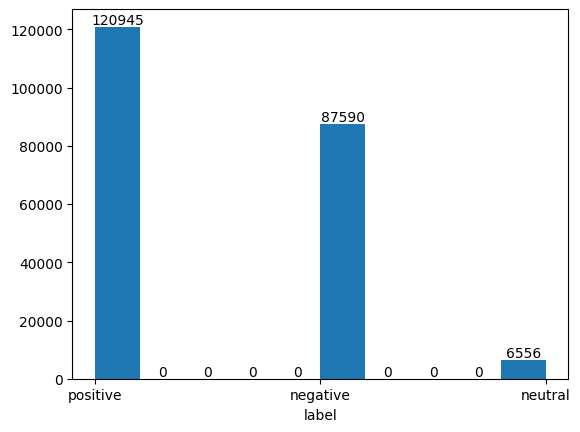

In [35]:
import matplotlib.pyplot as plt

x = df['label']
values, bins, bars = plt.hist(x)
plt.xlabel('label')
plt.bar_label(bars, fontsize=10)
plt.show()

In [36]:
cols_to_drop = df[(df['census region'] == 'northeast') | (df['census region'] == 'midwest')].index
df.drop(cols_to_drop, inplace=True)

df['census region'].value_counts()

census region
southern    83476
west        51483
Name: count, dtype: int64

In [37]:
import scipy.stats as stats
alpha = 0.05

region_v_label = pd.crosstab(df['census region'],df['label'],margins=True)
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(region_v_label)

if p_value < alpha:
    print("Significance Found")

print(p_value)

Significance Found
2.044303664622642e-52


In [38]:
region_v_answer = pd.crosstab(df['census region'],df['has owner answer'],margins=True)
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(region_v_answer)

if p_value < alpha:
    print("Significance Found")

print(p_value)

0.5815472775774261


In [39]:
label_v_answer = pd.crosstab(df['label'],df['has owner answer'],margins=True)
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(label_v_answer)

if p_value < alpha:
    print("Significance Found")

print(p_value)

Significance Found
2.0517751208627727e-301


In [40]:
three_way_contingency = pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True)
three_way_contingency

has owner answer            0      1     All
census region label                         
southern      negative  17715  15654   33369
              neutral    1135   1496    2631
              positive  18032  29444   47476
west          negative   8565   9826   18391
              neutral     663    894    1557
              positive  13761  17774   31535
All                     59871  75088  134959

In [41]:
alpha = 0.05

chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(three_way_contingency)

if p_value < alpha:
    print("Significance Found")

print(p_value)

Significance Found
0.0


In [42]:
pd.crosstab(df['census region'],df['label'],margins=True)

label,negative,neutral,positive,All
census region,,,,
southern,33369,2631,47476,83476
west,18391,1557,31535,51483
All,51760,4188,79011,134959


In [43]:
pd.crosstab(df['census region'],df['label'],margins=True,normalize='all')

label,negative,neutral,positive,All
census region,,,,
southern,0.247253,0.019495,0.351781,0.618529
west,0.136271,0.011537,0.233664,0.381471
All,0.383524,0.031032,0.585444,1.000000


In [44]:
pd.crosstab(df['census region'],df['label'],margins=True,normalize='columns')

label,negative,neutral,positive,All
census region,,,,
southern,0.644687,0.628223,0.600878,0.618529
west,0.355313,0.371777,0.399122,0.381471


In [45]:
pd.crosstab(df['census region'],df['label'],margins=True,normalize='index')

label,negative,neutral,positive
census region,,,
southern,0.399744,0.031518,0.568738
west,0.357225,0.030243,0.612532
All,0.383524,0.031032,0.585444


In [46]:
pd.crosstab(df['label'],df['has owner answer'],margins=True)

has owner answer,0,1,All
label,,,
negative,26280,25480,51760
neutral,1798,2390,4188
positive,31793,47218,79011
All,59871,75088,134959


In [47]:
pd.crosstab(df['label'],df['has owner answer'],margins=True, normalize='all')

has owner answer,0,1,All
label,,,
negative,0.194726,0.188798,0.383524
neutral,0.013323,0.017709,0.031032
positive,0.235575,0.349869,0.585444
All,0.443624,0.556376,1.000000


In [48]:
pd.crosstab(df['label'],df['has owner answer'],margins=True,normalize='columns')

has owner answer,0,1,All
label,,,
negative,0.438944,0.339335,0.383524
neutral,0.030031,0.031829,0.031032
positive,0.531025,0.628835,0.585444


In [49]:
pd.crosstab(df['label'],df['has owner answer'],margins=True,normalize='index')

has owner answer,0,1
label,,
negative,0.507728,0.492272
neutral,0.429322,0.570678
positive,0.402387,0.597613
All,0.443624,0.556376


In [50]:
pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True)

has owner answer            0      1     All
census region label                         
southern      negative  17715  15654   33369
              neutral    1135   1496    2631
              positive  18032  29444   47476
west          negative   8565   9826   18391
              neutral     663    894    1557
              positive  13761  17774   31535
All                     59871  75088  134959

In [51]:
pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='all')

has owner answer               0         1       All
census region label                                 
southern      negative  0.131262  0.115991  0.247253
              neutral   0.008410  0.011085  0.019495
              positive  0.133611  0.218170  0.351781
west          negative  0.063464  0.072807  0.136271
              neutral   0.004913  0.006624  0.011537
              positive  0.101964  0.131699  0.233664
All                     0.443624  0.556376  1.000000

In [52]:
pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='index')

has owner answer               0         1
census region label                       
southern      negative  0.530882  0.469118
              neutral   0.431395  0.568605
              positive  0.379813  0.620187
west          negative  0.465717  0.534283
              neutral   0.425819  0.574181
              positive  0.436372  0.563628
All                     0.443624  0.556376

In [53]:
pd.crosstab([df['census region'],df['label']],df['has owner answer'],margins=True, normalize='columns')

has owner answer               0         1       All
census region label                                 
southern      negative  0.295886  0.208475  0.247253
              neutral   0.018957  0.019923  0.019495
              positive  0.301181  0.392127  0.351781
west          negative  0.143058  0.130860  0.136271
              neutral   0.011074  0.011906  0.011537
              positive  0.229844  0.236709  0.233664

In [54]:
import demoji
import re

def remove_emoji(string):
    return demoji.replace(string, '')

def remove_extra_spaces(string):
    return re.sub(r'\s{2,}',' ',str(string))

df['cleaned text'] = df['Review Text'].apply(remove_emoji)
df['cleaned text'] = df['cleaned text'].apply(remove_extra_spaces)

df['cleaned text'].head()


0    MedStar Navy Yard is my new go-to for urgent h...
1    Dr. Kalra is a very good Doctor. He's all abou...
2    Dr. Janelle Leuschen is knowledgeable, patient...
3    Very efficient operation - making an appointme...
4    Everything from check in to Dr. visit to lab w...
Name: cleaned text, dtype: object

In [55]:
'''
Uses code from Ednalyn C. De Dios (2022)
https://github.com/ecdedios/d213-advanced-data-analytics/blob/main/task2/notebooks/D213%20Performance%20Assessment%20Task%202%20(Rev.%200)-Copy2.ipynb
and
William J. Townsend (2022)
https://github.com/WJTownsend/WGU_Portfolio/blob/main/D213/d213task2.ipynb
and
Charles G. Rowe (2025)
https://github.com/CGRowe96/WGU_MSDA/blob/main/D213/Task%202/D213-Task2.ipynb
'''

import nltk
import string
import unicodedata
import nltk.corpus
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_sentence(sentence):
    stops = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['...',' - ', 'ca', 'wo', "'s", "'ing","'ll", "'re"]
    negation = ['but', 'not', "don't", "aren't", "couldn't", "doesn't", "hadn't", "hasn't", "haven't", 
                  "isn't", "shouldn't", "wouldn't"]
    for word in negation:
        stops.remove(word)
    sentence = (unicodedata.normalize('NFKD', sentence)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore')
        .lower())
    words = re.sub(r'[^\w\s]', '', sentence).split()
    word_list = [word for word in words if word not in stops]
    return word_list

def get_words(df, column):
    return clean_sentence(''.join(str(df[column].tolist())))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charlesrowe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
mask = df['census region'] == 'southern'
south_df = df[mask]
south_df

,Author,Review Text,Review Rating,Date,Owner Answer,Owner Answer Date,Author Profile,Author Image,Review URL,label,zip,state,has owner answer,census region,cleaned text
0,Cindy Mac,MedStar Navy Yard is my new go-to for urgent ...,5,4/15/2025,Thank you so much for taking the time to share...,4 weeks ago,https://www.google.com/maps/contrib/1001501158...,https://lh3.googleusercontent.com/a/ACg8ocLHq1...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,20003.0,District of Columbia,1,southern,MedStar Navy Yard is my new go-to for urgent h...
1,Bea Hardy,Dr. Kalra is a very good Doctor. He's all abou...,5,4/20/2025,Thank you for sharing your wonderful experienc...,2 weeks ago,https://www.google.com/maps/contrib/1163404463...,https://lh3.googleusercontent.com/a/ACg8ocLdk0...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,20003.0,District of Columbia,1,southern,Dr. Kalra is a very good Doctor. He's all abou...
2,Yuhuan Song,"Dr. Janelle Leuschen is knowledgeable, patient...",5,1/28/2025,"Hi Yuhuan, thank you for your wonderful review...",3 months ago,https://www.google.com/maps/contrib/1088711346...,https://lh3.googleusercontent.com/a/ACg8ocLr9_...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,20003.0,District of Columbia,1,southern,"Dr. Janelle Leuschen is knowledgeable, patient..."
3,Beth Castberg Litton,Very efficient operation - making an appointme...,5,1/27/2025,Thank you so much for sharing this experience ...,3 months ago,https://www.google.com/maps/contrib/1089223471...,https://lh3.googleusercontent.com/a-/ALV-UjVwL...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,20003.0,District of Columbia,1,southern,Very efficient operation - making an appointme...
4,Gina Weller,Everything from check in to Dr. visit to lab w...,5,4/30/2025,"Hi Gina, thank you for sharing your experience...",4 days ago,https://www.google.com/maps/contrib/1153378942...,https://lh3.googleusercontent.com/a/ACg8ocKHwr...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,20003.0,District of Columbia,1,southern,Everything from check in to Dr. visit to lab w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205499,Pammy Minor,Terrible 😞 sad really,1,2/23/2024,no answer,no date,https://www.google.com/maps/contrib/1010567763...,https://lh3.googleusercontent.com/a/ACg8ocJSu5...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,24801.0,West Virginia,0,southern,Terrible sad really
205500,Teresa,Wish I had gone somewhere else.,1,11/9/2016,no answer,no date,https://www.google.com/maps/contrib/1007673731...,https://lh3.googleusercontent.com/a-/ALV-UjXs6...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,24801.0,West Virginia,0,southern,Wish I had gone somewhere else.
205501,Brooke Bishop,Staff was very rude!,1,9/19/2022,no answer,no date,https://www.google.com/maps/contrib/1124278477...,https://lh3.googleusercontent.com/a-/ALV-UjXm3...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,24801.0,West Virginia,0,southern,Staff was very rude!
205502,I am K marie,They take forever 😑,2,9/4/2018,no answer,no date,https://www.google.com/maps/contrib/1023820138...,https://lh3.googleusercontent.com/a-/ALV-UjWWa...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,24801.0,West Virginia,0,southern,They take forever


In [57]:
west_df = df[~mask]
west_df

,Author,Review Text,Review Rating,Date,Owner Answer,Owner Answer Date,Author Profile,Author Image,Review URL,label,zip,state,has owner answer,census region,cleaned text
2109,Shantell “shanny” I,When in for my Mammogram. First time at Castle...,5,4/25/2025,"Hi Shantell, thank you for taking the time to ...",2 weeks ago,https://www.google.com/maps/contrib/1087384604...,https://lh3.googleusercontent.com/a-/ALV-UjV3G...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,96734.0,Hawaii,1,west,When in for my Mammogram. First time at Castle...
2110,Gail Higaki,"The admission, CAT scan and nursing staff were...",5,4/23/2025,"Gail, thank you for the positive review! We wo...",2 weeks ago,https://www.google.com/maps/contrib/1021198441...,https://lh3.googleusercontent.com/a/ACg8ocJXsY...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,96734.0,Hawaii,1,west,"The admission, CAT scan and nursing staff were..."
2111,Sarah Iorillo,Alicia Wallace was amazing! Made me feel so co...,5,4/21/2025,"Sarah, thank you for the positive review! We w...",2 weeks ago,https://www.google.com/maps/contrib/1150861125...,https://lh3.googleusercontent.com/a-/ALV-UjVzj...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,96734.0,Hawaii,1,west,Alicia Wallace was amazing! Made me feel so co...
2112,Gary slovin,I was very impressed by the caring attitude di...,5,4/24/2025,"Hello Gary, thanks for taking the time to leav...",2 weeks ago,https://www.google.com/maps/contrib/1047845373...,https://lh3.googleusercontent.com/a/ACg8ocIeXk...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,96734.0,Hawaii,1,west,I was very impressed by the caring attitude di...
2113,Steve Gulden,Visited ER with a heart related issue and was ...,5,4/30/2025,Thanks for taking the time to acknowledge our ...,a week ago,https://www.google.com/maps/contrib/1128712338...,https://lh3.googleusercontent.com/a-/ALV-UjWMV...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,96734.0,Hawaii,1,west,Visited ER with a heart related issue and was ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222394,Thora Ortegren,great!,5,3/26/2022,"Hi, Thora. We greatly value your feedback and ...",3 years ago,https://www.google.com/maps/contrib/1001474320...,https://lh3.googleusercontent.com/a-/ALV-UjU5R...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,80027.0,Colorado,1,west,great!
222395,Abigail Neyland,I love being crazy as f***!,5,12/21/2015,no answer,no date,https://www.google.com/maps/contrib/1151959164...,https://lh3.googleusercontent.com/a/ACg8ocIYf8...,https://www.google.com/search?hl=en-US&gl=us&q...,positive,80027.0,Colorado,0,west,I love being crazy as f***!
222396,Dana Carroll,Inept. Thats all i can say. Inept and deceiving.,1,4/11/2016,no answer,no date,https://www.google.com/maps/contrib/1074698523...,https://lh3.googleusercontent.com/a/ACg8ocIfga...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,80027.0,Colorado,0,west,Inept. Thats all i can say. Inept and deceiving.
222397,Dianne Duncan,One word--HORRIBLE,1,4/26/2016,Dianne - thank you for taking the time to post...,9 years ago,https://www.google.com/maps/contrib/1060679638...,https://lh3.googleusercontent.com/a/ACg8ocL1jo...,https://www.google.com/search?hl=en-US&gl=us&q...,negative,80027.0,Colorado,1,west,One word--HORRIBLE


In [58]:
all_words = get_words(df, 'cleaned text')
all_freq = pd.Series(all_words).value_counts()
vocab_size = len(all_freq)

print('Vocabulary size: ' + str(vocab_size))

Vocabulary size: 137804


In [59]:
pos_mask = df['label'] == 'positive'
neg_mask = df['label'] == 'negative'
neu_mask = df['label'] == 'neutral'

all_pos_words = df[pos_mask]
all_neg_words = df[neg_mask]
all_neu_words = df[neu_mask]

a_pos_word_list = get_words(all_pos_words, 'cleaned text')
a_neg_word_list = get_words(all_neg_words, 'cleaned text')
a_neu_word_list = get_words(all_neu_words, 'cleaned text')

a_pos_word_freq = pd.Series(a_pos_word_list).value_counts()
a_neg_word_freq = pd.Series(a_neg_word_list).value_counts()
a_neu_word_freq = pd.Series(a_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq, a_pos_word_freq, a_neg_word_freq, a_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)

,all,pos,neg,neu
phenomenal,997,879.0,78.0,40.0
visit,9969,5350.0,4210.0,409.0
helpful,9942,8666.0,994.0,282.0
hadnt,994,169.0,771.0,54.0
write,990,261.0,700.0,29.0
diagnostics,99,52.0,46.0,1.0
commented,99,25.0,68.0,6.0
frequent,99,43.0,46.0,10.0
cramps,99,15.0,82.0,2.0
wvu,99,24.0,72.0,3.0


In [60]:
all_words_south = get_words(south_df, 'cleaned text')
all_freq_south = pd.Series(all_words_south).value_counts()
vocab_size_south = len(all_freq_south)

print('Vocabulary size: ' + str(vocab_size_south))

Vocabulary size: 95477


In [61]:
pos_mask = south_df['label'] == 'positive'
neg_mask = south_df['label'] == 'negative'
neu_mask = south_df['label'] == 'neutral'

south_pos_words = south_df[pos_mask]
south_neg_words = south_df[neg_mask]
south_neu_words = south_df[neu_mask]

s_pos_word_list = get_words(south_pos_words, 'cleaned text')
s_neg_word_list = get_words(south_neg_words, 'cleaned text')
s_neu_word_list = get_words(south_neu_words, 'cleaned text')

s_pos_word_freq = pd.Series(s_pos_word_list).value_counts()
s_neg_word_freq = pd.Series(s_neg_word_list).value_counts()
s_neu_word_freq = pd.Series(s_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq_south, s_pos_word_freq, s_neg_word_freq, s_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)

,all,pos,neg,neu
clearly,998,245.0,715.0,38.0
expect,998,406.0,536.0,56.0
etc,995,394.0,544.0,57.0
nobody,994,93.0,862.0,39.0
paperwork,993,273.0,659.0,61.0
stomach,992,184.0,781.0,27.0
kinds,99,35.0,59.0,5.0
halls,99,28.0,65.0,6.0
soul,99,41.0,54.0,4.0
prove,99,9.0,86.0,4.0


In [62]:
all_words_west = get_words(west_df, 'cleaned text')
all_freq_west = pd.Series(all_words_west).value_counts()
vocab_size_west = len(all_freq_west)

print('Vocabulary size: ' + str(vocab_size_west))

Vocabulary size: 73637


In [63]:
pos_mask = west_df['label'] == 'positive'
neg_mask = west_df['label'] == 'negative'
neu_mask = west_df['label'] == 'neutral'

west_pos_words = west_df[pos_mask]
west_neg_words = west_df[neg_mask]
west_neu_words = west_df[neu_mask]

w_pos_word_list = get_words(west_pos_words, 'cleaned text')
w_neg_word_list = get_words(west_neg_words, 'cleaned text')
w_neu_word_list = get_words(west_neu_words, 'cleaned text')

w_pos_word_freq = pd.Series(w_pos_word_list).value_counts()
w_neg_word_freq = pd.Series(w_neg_word_list).value_counts()
w_neu_word_freq = pd.Series(w_neu_word_list).value_counts()

word_counts_df = (pd.concat([all_freq_west, w_pos_word_freq, w_neg_word_freq, w_neu_word_freq],
                            axis=1, sort=True).set_axis(['all','pos','neg','neu'], axis=1)
                            .apply(lambda s: s.astype(str)))

word_counts_df.fillna(0)
word_counts_df.sort_values(by='all', ascending=False).head(10)

,all,pos,neg,neu
others,997,468.0,486.0,43.0
speak,996,181.0,779.0,36.0
cannot,993,498.0,470.0,25.0
experiences,991,582.0,365.0,44.0
provider,990,467.0,495.0,28.0
feelings,99,37.0,52.0,10.0
kick,99,17.0,81.0,1.0
james,99,73.0,21.0,5.0
formal,99,3.0,95.0,1.0
originally,99,35.0,61.0,3.0


In [ ]:
'''
Uses code from Ednalyn C. De Dios (2022)
https://github.com/ecdedios/d213-advanced-data-analytics/blob/main/task2/notebooks/D213%20Performance%20Assessment%20Task%202%20(Rev.%200)-Copy2.ipynb
'''

def get_bigrams(words):
    return (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

def get_trigrams(words):
    return (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

def get_qualgrams(words):
    return (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]

def viz_bigrams(df, column, title):
    get_bigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

def viz_trigrams(df, column, title):
    get_trigrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Trigram')
    plt.xlabel('# Occurances')
    
def viz_qualgrams(df, column, title):
    get_qualgrams(get_words(df,column)).sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

    plt.title(title)
    plt.ylabel('Qualgram')
    plt.xlabel('# Occurances')

In [ ]:
viz_bigrams(df,'cleaned text','Most Frequent Bigrams (All)')

KeyboardInterrupt: 

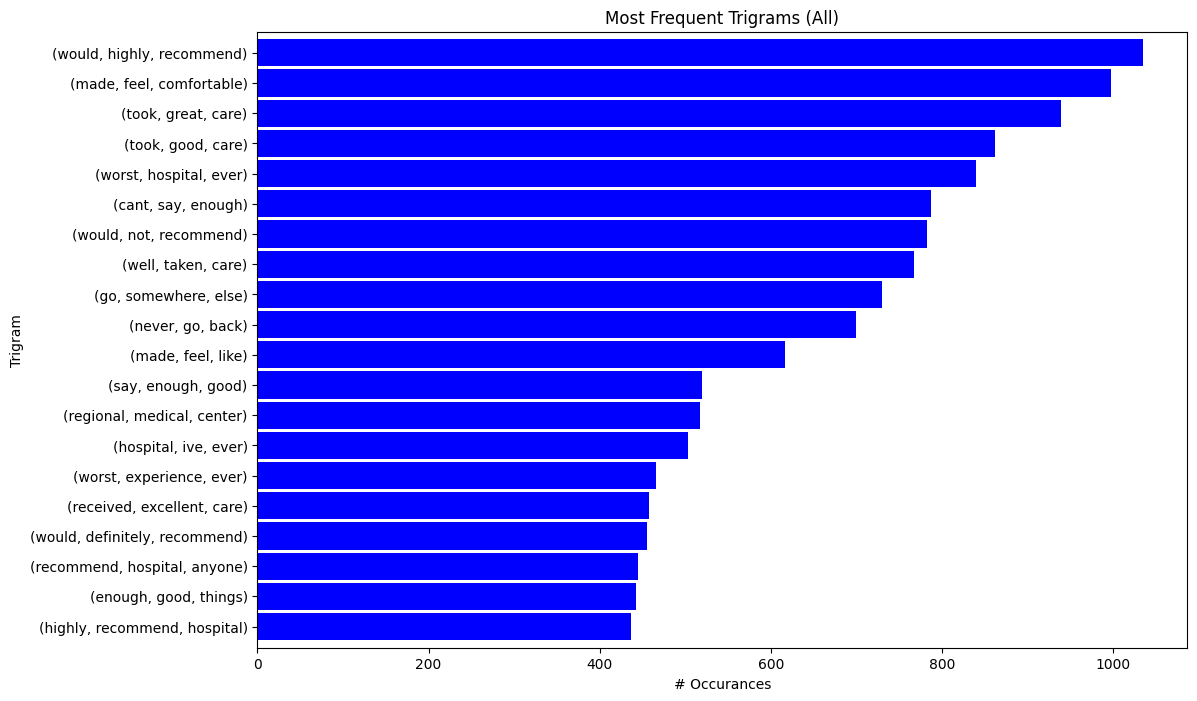

In [ ]:
viz_trigrams(df,'cleaned text','Most Frequent Trigrams (All)')

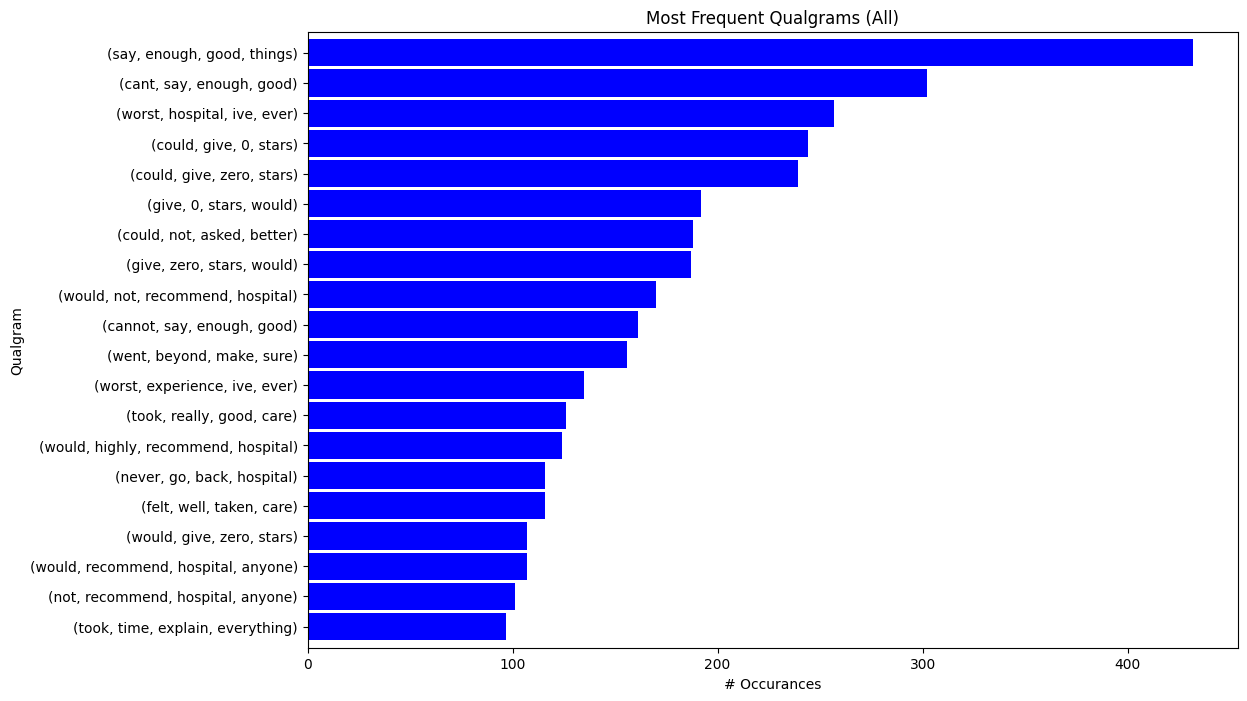

In [ ]:
viz_qualgrams(df,'cleaned text','Most Frequent Qualgrams (All)')

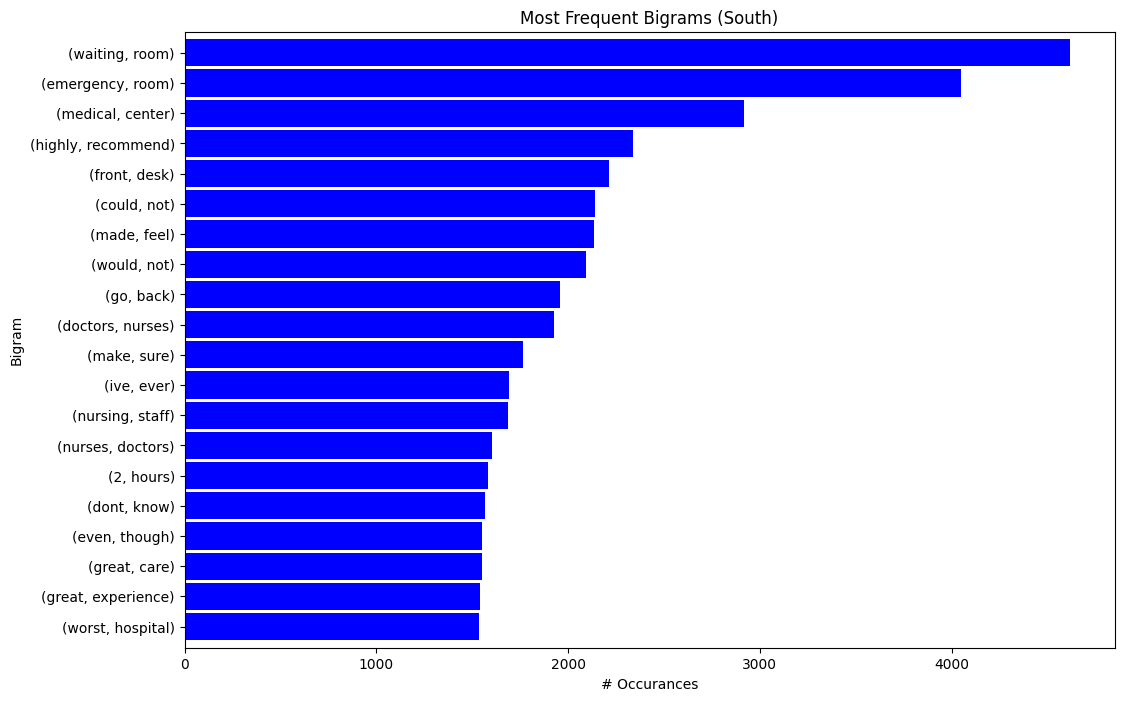

In [ ]:
viz_bigrams(south_df,'cleaned text','Most Frequent Bigrams (South)')

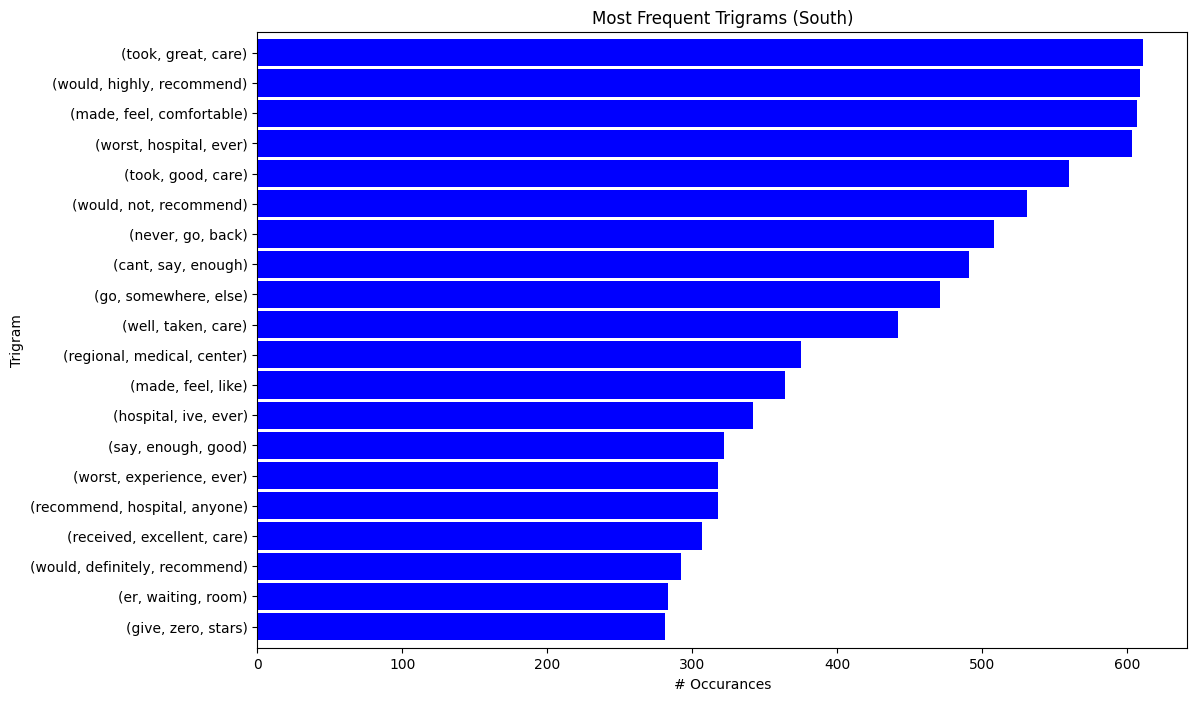

In [ ]:
viz_trigrams(south_df,'cleaned text','Most Frequent Trigrams (South)')

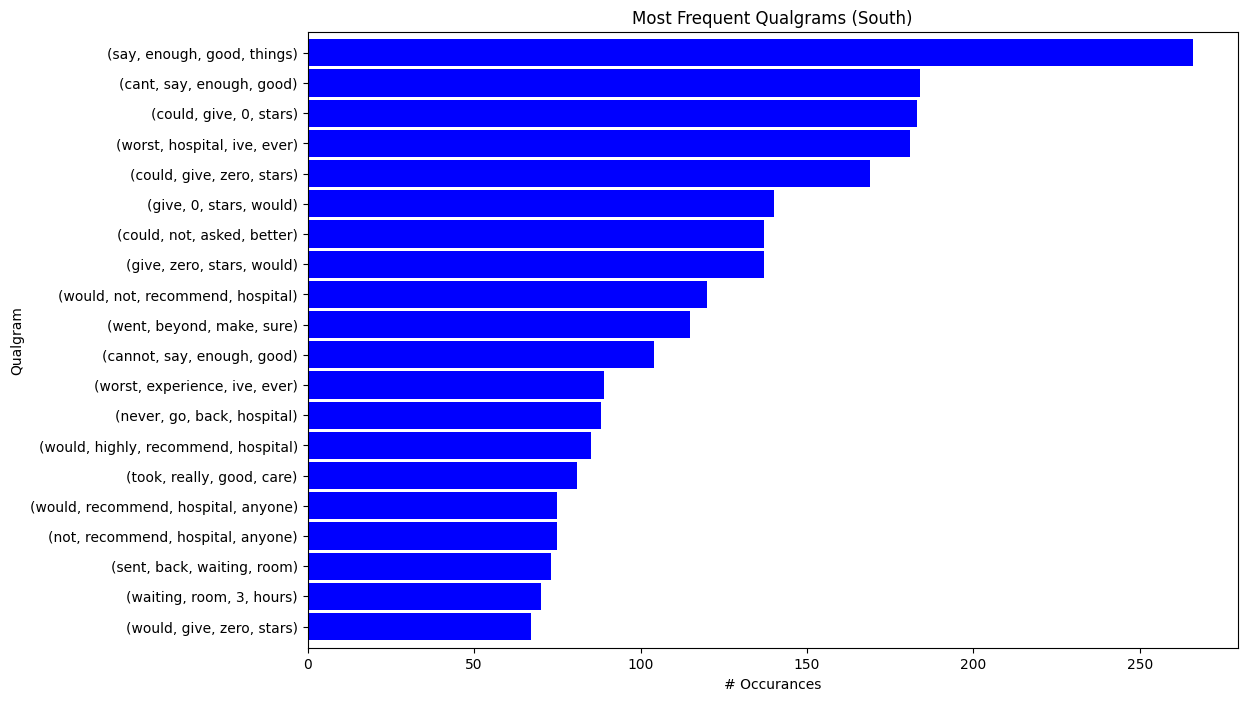

In [ ]:
viz_qualgrams(south_df,'cleaned text','Most Frequent Qualgrams (South)')

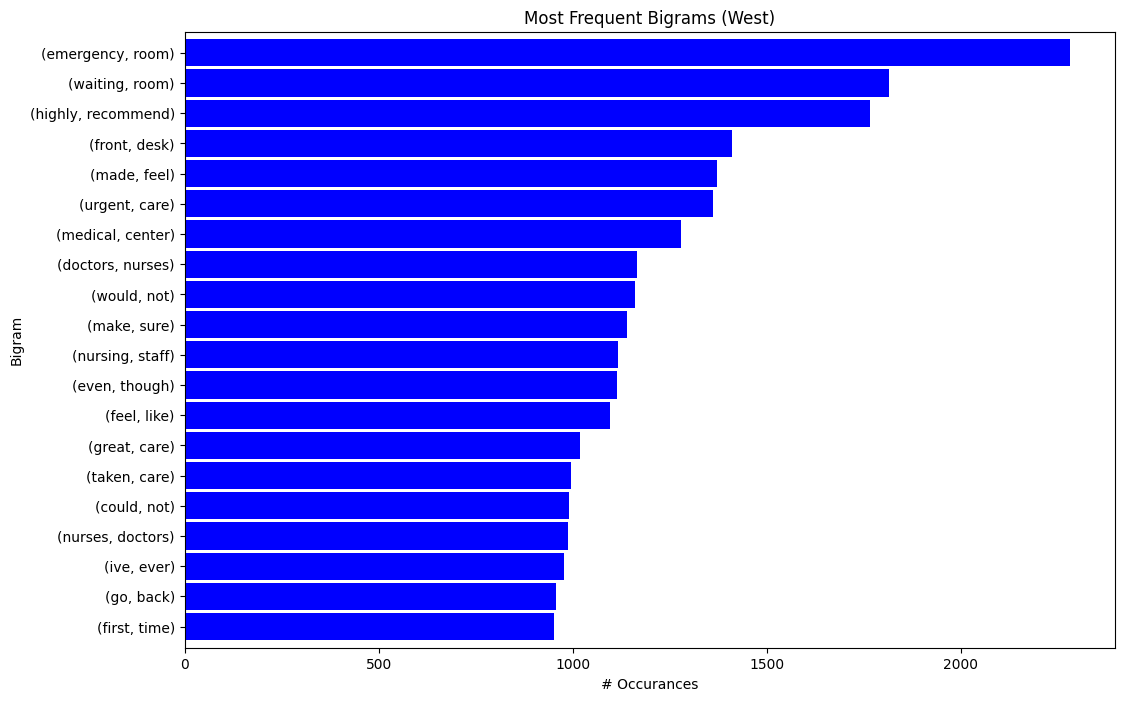

In [ ]:
viz_bigrams(west_df,'cleaned text','Most Frequent Bigrams (West)')

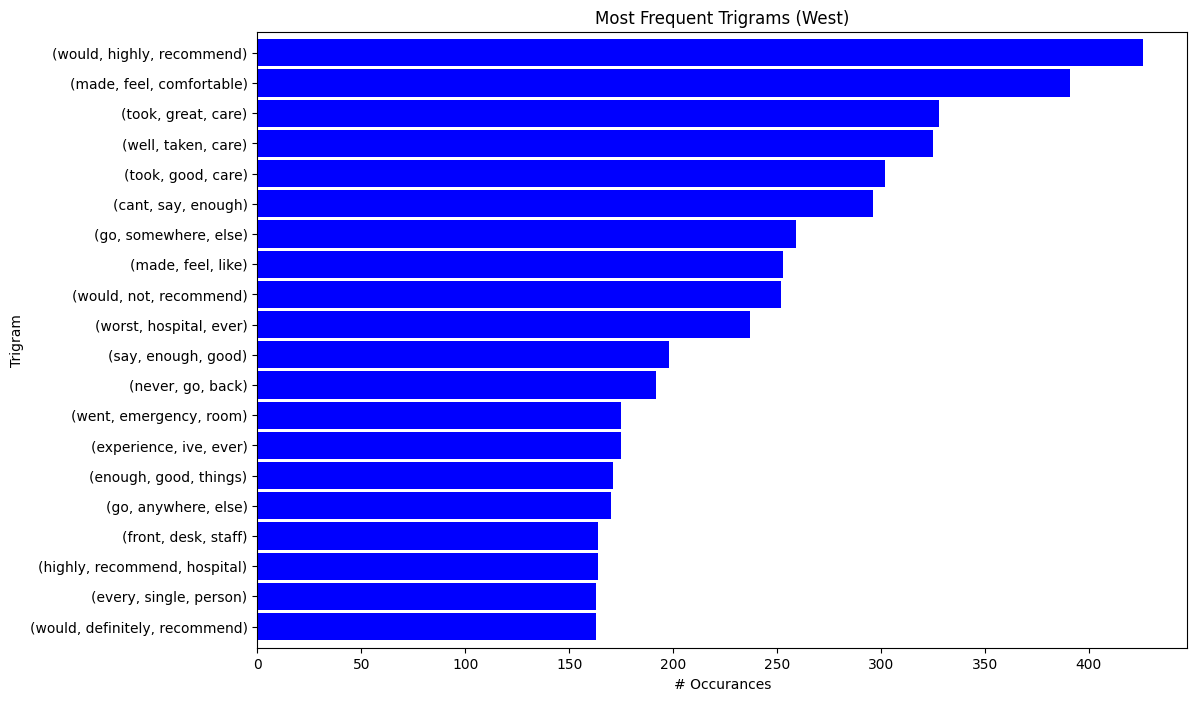

In [ ]:
viz_trigrams(west_df,'cleaned text','Most Frequent Trigrams (West)')

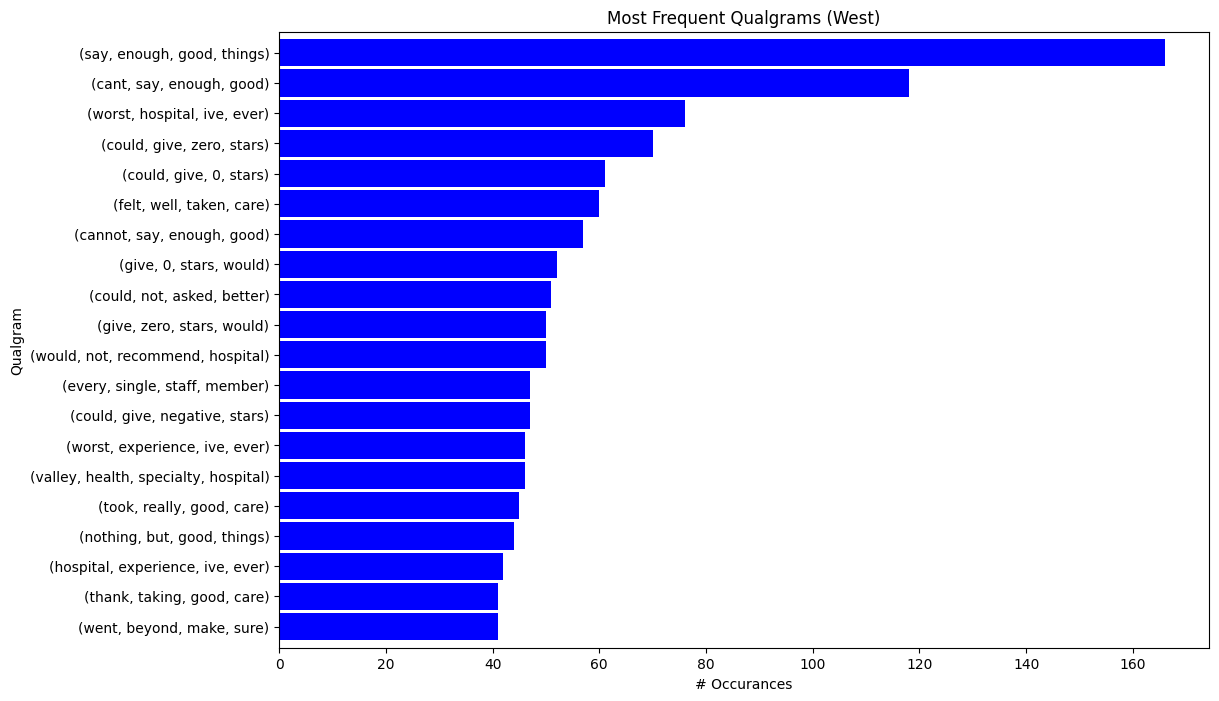

In [ ]:
viz_qualgrams(west_df,'cleaned text','Most Frequent Qualgrams (West)')

In [ ]:
'''
Uses code from GeekForGeeks (2022)
https://www.geeksforgeeks.org/nlp-word-collocations/
'''

from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

stopset = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['...',' - ', 'ca', 'wo', "'s", "'ing","'ll", "'re"]
filter_stops = lambda w: len(w) < 3 or w in stopset

def get_bi_collocations(list):
    list_col = [a.lower() for a in list]
    biagram_collocation = BigramCollocationFinder.from_words(list_col)
    biagram_collocation.apply_word_filter(filter_stops)
    return biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

def get_tri_collocation(list):
    list_col = [a.lower() for a in list]
    trigram_collocation = TrigramCollocationFinder.from_words(list_col)
    trigram_collocation.apply_word_filter(filter_stops)
    trigram_collocation.apply_freq_filter(3)
    return trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

def get_bicol_scores(list):
    list_col = [a.lower() for a in list]
    biagram_collocation = BigramCollocationFinder.from_words(list_col)
    biagram_collocation.apply_word_filter(filter_stops)
    return biagram_collocation.score_ngrams(BigramAssocMeasures.likelihood_ratio)

def get_tricol_scores(list):
    list_col = [a.lower() for a in list]
    trigram_collocation = TrigramCollocationFinder.from_words(list_col)
    trigram_collocation.apply_word_filter(filter_stops)
    trigram_collocation.apply_freq_filter(3)
    return trigram_collocation.score_ngrams(TrigramAssocMeasures.likelihood_ratio)

In [ ]:
get_bi_collocations(all_words)

[('emergency', 'room'),
 ('waiting', 'room'),
 ('highly', 'recommend'),
 ('front', 'desk'),
 ('medical', 'center'),
 ('made', 'feel'),
 ('make', 'sure'),
 ('labor', 'delivery'),
 ('even', 'though'),
 ('blood', 'pressure'),
 ('year', 'old'),
 ('bedside', 'manner'),
 ('urgent', 'care'),
 ('top', 'notch'),
 ('nursing', 'staff')]

In [ ]:
get_bicol_scores(all_words)

[(('emergency', 'room'), 48197.80450237711),
 (('waiting', 'room'), 45493.21271098011),
 (('highly', 'recommend'), 45113.170544635956),
 (('front', 'desk'), 43523.983815098385),
 (('medical', 'center'), 38362.89695982341),
 (('made', 'feel'), 26637.89355135082),
 (('make', 'sure'), 25132.397631546883),
 (('labor', 'delivery'), 24442.089959775065),
 (('even', 'though'), 23563.738801839507),
 (('blood', 'pressure'), 23166.230668598553),
 (('year', 'old'), 21747.668975256027),
 (('bedside', 'manner'), 21151.51701475379),
 (('urgent', 'care'), 20066.327006089883),
 (('top', 'notch'), 19761.466489288054),
 (('nursing', 'staff'), 19754.537944910215),
 (('ive', 'ever'), 19237.943066493182),
 (('family', 'member'), 17634.403216881743),
 (('customer', 'service'), 17418.249246697553),
 (('sent', 'home'), 17207.792810611576),
 (('made', 'sure'), 16868.543709356243),
 (('somewhere', 'else'), 16670.866193928137),
 (('feel', 'comfortable'), 16548.230393621645),
 (('next', 'day'), 16302.361379087979)

In [ ]:
get_tri_collocation(all_words)

[('would', 'highly', 'recommend'),
 ('highly', 'recommend', 'anyone'),
 ('highly', 'recommend', 'hospital'),
 ('still', 'waiting', 'room'),
 ('sat', 'emergency', 'room'),
 ('sitting', 'emergency', 'room'),
 ('went', 'emergency', 'room'),
 ('hours', 'emergency', 'room'),
 ('sit', 'emergency', 'room'),
 ('hours', 'waiting', 'room'),
 ('back', 'emergency', 'room'),
 ('waiting', 'room', 'hours'),
 ('medical', 'emergency', 'room'),
 ('sitting', 'waiting', 'room'),
 ('taken', 'emergency', 'room')]

In [ ]:
get_tricol_scores(all_words)

[(('would', 'highly', 'recommend'), 60561.98270294684),
 (('highly', 'recommend', 'anyone'), 52308.34605617851),
 (('highly', 'recommend', 'hospital'), 50841.59854195962),
 (('still', 'waiting', 'room'), 50722.50568715178),
 (('sat', 'emergency', 'room'), 50335.43221335912),
 (('sitting', 'emergency', 'room'), 50249.270355785215),
 (('went', 'emergency', 'room'), 50092.728125789006),
 (('hours', 'emergency', 'room'), 49429.06104898478),
 (('sit', 'emergency', 'room'), 49357.56580227622),
 (('hours', 'waiting', 'room'), 49328.649029106055),
 (('back', 'emergency', 'room'), 49309.24489387789),
 (('waiting', 'room', 'hours'), 49265.9442388481),
 (('medical', 'emergency', 'room'), 49147.335527538686),
 (('sitting', 'waiting', 'room'), 49047.129086111316),
 (('taken', 'emergency', 'room'), 48818.93874697397),
 (('sat', 'waiting', 'room'), 48709.176410585715),
 (('wait', 'emergency', 'room'), 48642.23422756343),
 (('need', 'emergency', 'room'), 48628.75228486358),
 (('emergency', 'room', 'ho

In [ ]:
get_bi_collocations(a_pos_word_list)

[('highly', 'recommend'),
 ('medical', 'center'),
 ('front', 'desk'),
 ('made', 'feel'),
 ('emergency', 'room'),
 ('top', 'notch'),
 ('labor', 'delivery'),
 ('made', 'sure'),
 ('make', 'sure'),
 ('feel', 'comfortable'),
 ('god', 'bless'),
 ('went', 'beyond'),
 ('bedside', 'manner'),
 ('answered', 'questions'),
 ('say', 'enough')]

In [ ]:
get_bicol_scores(a_pos_word_list)

[(('highly', 'recommend'), 40372.21004390291),
 (('medical', 'center'), 25291.93925254253),
 (('front', 'desk'), 20950.82680938857),
 (('made', 'feel'), 20800.160305372956),
 (('emergency', 'room'), 18731.943405024726),
 (('top', 'notch'), 17307.588478090373),
 (('labor', 'delivery'), 16816.22349618764),
 (('made', 'sure'), 15651.750214953136),
 (('make', 'sure'), 14601.357815581518),
 (('feel', 'comfortable'), 13416.577243192214),
 (('god', 'bless'), 12660.979816701249),
 (('went', 'beyond'), 12241.219149337634),
 (('bedside', 'manner'), 12041.24734269291),
 (('answered', 'questions'), 11992.349289434545),
 (('say', 'enough'), 11400.190935643914),
 (('nursing', 'staff'), 11340.85033081348),
 (('doctors', 'nurses'), 11238.766617810019),
 (('would', 'recommend'), 10522.683651215644),
 (('taken', 'care'), 10412.966106664979),
 (('every', 'single'), 9832.410288091154),
 (('thank', 'much'), 9829.179045944707),
 (('ive', 'ever'), 9237.562991911649),
 (('explained', 'everything'), 9077.62089

In [ ]:
get_tri_collocation(a_pos_word_list)

[('would', 'highly', 'recommend'),
 ('highly', 'recommend', 'anyone'),
 ('highly', 'recommend', 'hospital'),
 ('highly', 'recommend', 'facility'),
 ('highly', 'recommend', 'place'),
 ('highly', 'recommend', 'friends'),
 ('1010', 'highly', 'recommend'),
 ('highly', 'recommend', 'anybody'),
 ('highly', 'recommend', 'others'),
 ('highly', 'recommend', 'clinic'),
 ('highly', 'recommend', 'rehabilitation'),
 ('highly', 'recommend', 'everyone'),
 ('highly', 'recommend', 'using'),
 ('highly', 'recommend', 'coming'),
 ('highly', 'recommend', 'family')]

In [ ]:
get_tricol_scores(a_pos_word_list)

[(('would', 'highly', 'recommend'), 49879.833054261064),
 (('highly', 'recommend', 'anyone'), 45091.43301518975),
 (('highly', 'recommend', 'hospital'), 43957.53035279334),
 (('highly', 'recommend', 'facility'), 42545.260732256),
 (('highly', 'recommend', 'place'), 41589.284636334436),
 (('highly', 'recommend', 'friends'), 40818.74472606221),
 (('1010', 'highly', 'recommend'), 40714.487150939014),
 (('highly', 'recommend', 'anybody'), 40671.48131077301),
 (('highly', 'recommend', 'others'), 40624.31461862957),
 (('highly', 'recommend', 'clinic'), 40624.30589804672),
 (('highly', 'recommend', 'rehabilitation'), 40594.23862977618),
 (('highly', 'recommend', 'everyone'), 40590.82877873997),
 (('highly', 'recommend', 'using'), 40581.39844132478),
 (('highly', 'recommend', 'coming'), 40561.12661757258),
 (('highly', 'recommend', 'family'), 40556.48191100579),
 (('highly', 'recommend', 'location'), 40533.513403375066),
 (('highly', 'recommend', 'practice'), 40518.379919008454),
 (('highly', 

In [ ]:
get_bi_collocations(a_neg_word_list)

[('waiting', 'room'),
 ('emergency', 'room'),
 ('front', 'desk'),
 ('blood', 'pressure'),
 ('somewhere', 'else'),
 ('sent', 'home'),
 ('year', 'old'),
 ('even', 'though'),
 ('family', 'member'),
 ('loved', 'ones'),
 ('medical', 'center'),
 ('next', 'day'),
 ('urgent', 'care'),
 ('dont', 'know'),
 ('customer', 'service')]

In [ ]:
get_bicol_scores(a_neg_word_list)

[(('waiting', 'room'), 36070.9334501969),
 (('emergency', 'room'), 28282.398707914646),
 (('front', 'desk'), 21178.623243230497),
 (('blood', 'pressure'), 17636.762347696873),
 (('somewhere', 'else'), 15331.772550660753),
 (('sent', 'home'), 14789.730825652929),
 (('year', 'old'), 14778.125737251801),
 (('even', 'though'), 14197.674390620768),
 (('family', 'member'), 13411.984310279906),
 (('loved', 'ones'), 12117.665911299704),
 (('medical', 'center'), 11710.253031987355),
 (('next', 'day'), 11399.090489130262),
 (('urgent', 'care'), 11164.737201415091),
 (('dont', 'know'), 10732.485550340505),
 (('customer', 'service'), 10308.086094447313),
 (('worst', 'hospital'), 9948.071937777368),
 (('ive', 'ever'), 9920.864412721443),
 (('make', 'sure'), 9616.81508046089),
 (('could', 'give'), 8929.868196005755),
 (('zero', 'stars'), 8591.175854975207),
 (('billing', 'department'), 8586.440741855271),
 (('didnt', 'even'), 8099.6774404254165),
 (('come', 'back'), 8014.250976967358),
 (('heart', '

In [ ]:
get_tri_collocation(a_neg_word_list)

[('still', 'waiting', 'room'),
 ('waiting', 'room', 'hours'),
 ('hours', 'waiting', 'room'),
 ('sitting', 'waiting', 'room'),
 ('sat', 'waiting', 'room'),
 ('sit', 'waiting', 'room'),
 ('back', 'waiting', 'room'),
 ('people', 'waiting', 'room'),
 ('went', 'waiting', 'room'),
 ('waiting', 'room', 'hour'),
 ('die', 'waiting', 'room'),
 ('put', 'waiting', 'room'),
 ('moved', 'waiting', 'room'),
 ('wait', 'waiting', 'room'),
 ('left', 'waiting', 'room')]

In [ ]:
get_tricol_scores(a_neg_word_list)

[(('still', 'waiting', 'room'), 40624.47710484727),
 (('waiting', 'room', 'hours'), 39275.22801335439),
 (('hours', 'waiting', 'room'), 39039.68516008775),
 (('sitting', 'waiting', 'room'), 38977.44168395199),
 (('sat', 'waiting', 'room'), 38666.46200348396),
 (('sit', 'waiting', 'room'), 37466.93969813414),
 (('back', 'waiting', 'room'), 37295.519198237766),
 (('people', 'waiting', 'room'), 37066.49020572575),
 (('went', 'waiting', 'room'), 36692.21789421871),
 (('waiting', 'room', 'hour'), 36613.43654340062),
 (('die', 'waiting', 'room'), 36559.84400798844),
 (('put', 'waiting', 'room'), 36522.07320592724),
 (('moved', 'waiting', 'room'), 36486.63963046737),
 (('wait', 'waiting', 'room'), 36478.58001715357),
 (('left', 'waiting', 'room'), 36449.81161007847),
 (('empty', 'waiting', 'room'), 36434.251877660776),
 (('waited', 'waiting', 'room'), 36424.15642067063),
 (('waiting', 'room', 'dirty'), 36418.33349379899),
 (('taken', 'waiting', 'room'), 36415.67788293193),
 (('hrs', 'waiting'

In [ ]:
get_bi_collocations(a_neu_word_list)

[('front', 'desk'),
 ('waiting', 'room'),
 ('emergency', 'room'),
 ('nursing', 'staff'),
 ('bedside', 'manner'),
 ('blood', 'pressure'),
 ('labor', 'delivery'),
 ('next', 'day'),
 ('make', 'sure'),
 ('even', 'though'),
 ('customer', 'service'),
 ('medical', 'center'),
 ('dont', 'know'),
 ('family', 'member'),
 ('feel', 'like')]

In [ ]:
get_bicol_scores(a_neu_word_list)

[(('front', 'desk'), 1696.2843925390243),
 (('waiting', 'room'), 1634.4937610087889),
 (('emergency', 'room'), 1345.8626994085016),
 (('nursing', 'staff'), 1093.3123814707717),
 (('bedside', 'manner'), 958.1874281626143),
 (('blood', 'pressure'), 870.2178014439565),
 (('labor', 'delivery'), 855.6234965666986),
 (('next', 'day'), 805.1970972017539),
 (('make', 'sure'), 800.9712441954756),
 (('even', 'though'), 795.9010688103954),
 (('customer', 'service'), 791.2665679912876),
 (('medical', 'center'), 745.2996710715761),
 (('dont', 'know'), 687.5876581082676),
 (('family', 'member'), 653.5391453977011),
 (('feel', 'like'), 627.048089785854),
 (('pain', 'meds'), 576.563232669928),
 (('sent', 'home'), 556.0541174658334),
 (('felt', 'like'), 533.9786074323939),
 (('wait', 'time'), 514.6743971628342),
 (('family', 'members'), 513.5909183069085),
 (('several', 'times'), 476.39686080687216),
 (('years', 'ago'), 475.931359906707),
 (('waiting', 'area'), 469.39542443593245),
 (('first', 'time'),

In [ ]:
get_tri_collocation(a_neu_word_list)

[('sitting', 'waiting', 'room'),
 ('lady', 'front', 'desk'),
 ('hours', 'waiting', 'room'),
 ('front', 'desk', 'staff'),
 ('front', 'desk', 'lady'),
 ('front', 'desk', 'people'),
 ('people', 'front', 'desk'),
 ('front', 'desk', 'checkin'),
 ('checked', 'front', 'desk'),
 ('front', 'desk', 'ladies'),
 ('front', 'desk', 'worker'),
 ('sat', 'waiting', 'room'),
 ('front', 'desk', 'security'),
 ('staff', 'front', 'desk'),
 ('front', 'desk', 'friendly')]

In [ ]:
get_tricol_scores(a_neu_word_list)

[(('sitting', 'waiting', 'room'), 1781.6512962891966),
 (('lady', 'front', 'desk'), 1763.1511448745155),
 (('hours', 'waiting', 'room'), 1755.3511175475182),
 (('front', 'desk', 'staff'), 1751.4511249703291),
 (('front', 'desk', 'lady'), 1744.0059358293795),
 (('front', 'desk', 'people'), 1739.3227674248847),
 (('people', 'front', 'desk'), 1734.7736680940707),
 (('front', 'desk', 'checkin'), 1724.970226759774),
 (('checked', 'front', 'desk'), 1723.6082965275275),
 (('front', 'desk', 'ladies'), 1720.3720169086262),
 (('front', 'desk', 'worker'), 1719.6474979165448),
 (('sat', 'waiting', 'room'), 1718.8818470448264),
 (('front', 'desk', 'security'), 1715.9133980740369),
 (('staff', 'front', 'desk'), 1712.5969760555329),
 (('front', 'desk', 'friendly'), 1712.2980012045446),
 (('front', 'desk', 'check'), 1707.8097804022232),
 (('front', 'desk', 'nurse'), 1706.1364497674624),
 (('front', 'desk', 'great'), 1703.2628979040062),
 (('people', 'waiting', 'room'), 1702.3838954664905),
 (('one', '

In [ ]:
get_bi_collocations(all_words_south)

[('waiting', 'room'),
 ('emergency', 'room'),
 ('medical', 'center'),
 ('front', 'desk'),
 ('highly', 'recommend'),
 ('made', 'feel'),
 ('blood', 'pressure'),
 ('labor', 'delivery'),
 ('make', 'sure'),
 ('year', 'old'),
 ('even', 'though'),
 ('bedside', 'manner'),
 ('sent', 'home'),
 ('top', 'notch'),
 ('ive', 'ever')]

In [ ]:
get_bicol_scores(all_words_south)

[(('waiting', 'room'), 32381.0159374093),
 (('emergency', 'room'), 30479.389446134534),
 (('medical', 'center'), 27072.08460602324),
 (('front', 'desk'), 26112.09000271987),
 (('highly', 'recommend'), 25664.416352452743),
 (('made', 'feel'), 16524.712419350697),
 (('blood', 'pressure'), 15976.705672241103),
 (('labor', 'delivery'), 15839.900058440067),
 (('make', 'sure'), 15273.533167566502),
 (('year', 'old'), 14200.14785501006),
 (('even', 'though'), 13748.001848077198),
 (('bedside', 'manner'), 13686.111014781462),
 (('sent', 'home'), 12260.30735950226),
 (('top', 'notch'), 12245.075531750308),
 (('ive', 'ever'), 12228.33746668023),
 (('nursing', 'staff'), 11948.140058266645),
 (('family', 'member'), 11173.000213454532),
 (('somewhere', 'else'), 10874.204341722967),
 (('made', 'sure'), 10715.446985579118),
 (('customer', 'service'), 10470.609732130926),
 (('next', 'day'), 10183.765267158025),
 (('feel', 'comfortable'), 9983.375751459871),
 (('dont', 'know'), 9625.894866886916),
 (('

In [ ]:
get_tri_collocation(all_words_south)

[('still', 'waiting', 'room'),
 ('would', 'highly', 'recommend'),
 ('waiting', 'room', 'hours'),
 ('sitting', 'waiting', 'room'),
 ('hours', 'waiting', 'room'),
 ('sat', 'waiting', 'room'),
 ('sit', 'waiting', 'room'),
 ('back', 'waiting', 'room'),
 ('people', 'waiting', 'room'),
 ('went', 'waiting', 'room'),
 ('waiting', 'room', 'hour'),
 ('taken', 'waiting', 'room'),
 ('die', 'waiting', 'room'),
 ('wait', 'waiting', 'room'),
 ('put', 'waiting', 'room')]

In [ ]:
get_tricol_scores(all_words_south)

[(('still', 'waiting', 'room'), 36182.88580742632),
 (('would', 'highly', 'recommend'), 35343.54064026234),
 (('waiting', 'room', 'hours'), 34980.22697713304),
 (('sitting', 'waiting', 'room'), 34957.283772646144),
 (('hours', 'waiting', 'room'), 34886.79929411481),
 (('sat', 'waiting', 'room'), 34760.52965482024),
 (('sit', 'waiting', 'room'), 33769.790282688235),
 (('back', 'waiting', 'room'), 33457.868205342595),
 (('people', 'waiting', 'room'), 33394.71700984662),
 (('went', 'waiting', 'room'), 32984.267445854086),
 (('waiting', 'room', 'hour'), 32854.30052255636),
 (('taken', 'waiting', 'room'), 32790.33871664407),
 (('die', 'waiting', 'room'), 32780.38737431125),
 (('wait', 'waiting', 'room'), 32779.92330055117),
 (('put', 'waiting', 'room'), 32777.400336901235),
 (('waiting', 'room', 'full'), 32738.456804518857),
 (('got', 'waiting', 'room'), 32730.542739158554),
 (('moved', 'waiting', 'room'), 32726.618822333665),
 (('left', 'waiting', 'room'), 32722.807515931094),
 (('waited',

In [ ]:
get_bi_collocations(s_pos_word_list)

[('highly', 'recommend'),
 ('medical', 'center'),
 ('made', 'feel'),
 ('front', 'desk'),
 ('emergency', 'room'),
 ('labor', 'delivery'),
 ('top', 'notch'),
 ('made', 'sure'),
 ('make', 'sure'),
 ('went', 'beyond'),
 ('feel', 'comfortable'),
 ('god', 'bless'),
 ('bedside', 'manner'),
 ('answered', 'questions'),
 ('say', 'enough')]

In [ ]:
get_bicol_scores(s_pos_word_list)

[(('highly', 'recommend'), 22898.5390309707),
 (('medical', 'center'), 17658.079607093714),
 (('made', 'feel'), 13090.80762649691),
 (('front', 'desk'), 12664.535531813084),
 (('emergency', 'room'), 11525.134844850729),
 (('labor', 'delivery'), 10658.725751217891),
 (('top', 'notch'), 10589.1439108436),
 (('made', 'sure'), 9784.258057473426),
 (('make', 'sure'), 8721.976256140637),
 (('went', 'beyond'), 8193.457428490326),
 (('feel', 'comfortable'), 8113.08968955065),
 (('god', 'bless'), 7952.673683208961),
 (('bedside', 'manner'), 7609.625881636468),
 (('answered', 'questions'), 7251.611201859995),
 (('say', 'enough'), 6991.380697430324),
 (('doctors', 'nurses'), 6901.79593605546),
 (('would', 'recommend'), 6809.665669278161),
 (('nursing', 'staff'), 6757.735650393301),
 (('every', 'single'), 5911.591916361577),
 (('explained', 'everything'), 5860.795145120397),
 (('taken', 'care'), 5708.059412917003),
 (('excellent', 'care'), 5606.5183164315395),
 (('ive', 'ever'), 5487.520982146192)

In [ ]:
get_tri_collocation(s_pos_word_list)

[('would', 'highly', 'recommend'),
 ('highly', 'recommend', 'anyone'),
 ('highly', 'recommend', 'hospital'),
 ('highly', 'recommend', 'facility'),
 ('made', 'feel', 'comfortable'),
 ('highly', 'recommend', 'place'),
 ('1010', 'highly', 'recommend'),
 ('highly', 'recommend', 'friends'),
 ('highly', 'recommend', 'others'),
 ('highly', 'recommend', 'everyone'),
 ('highly', 'recommend', 'select'),
 ('highly', 'recommend', 'using'),
 ('highly', 'recommend', 'location'),
 ('highly', 'recommend', 'family'),
 ('highly', 'recommend', 'clinic')]

In [ ]:
get_tricol_scores(s_pos_word_list)

[(('would', 'highly', 'recommend'), 28599.6095425141),
 (('highly', 'recommend', 'anyone'), 25913.782403862824),
 (('highly', 'recommend', 'hospital'), 25342.203735077637),
 (('highly', 'recommend', 'facility'), 24152.950603765214),
 (('made', 'feel', 'comfortable'), 23669.465407569256),
 (('highly', 'recommend', 'place'), 23437.93845818505),
 (('1010', 'highly', 'recommend'), 23154.056803677955),
 (('highly', 'recommend', 'friends'), 23147.160259268367),
 (('highly', 'recommend', 'others'), 23072.38888347772),
 (('highly', 'recommend', 'everyone'), 23042.548519375167),
 (('highly', 'recommend', 'select'), 23035.720232934327),
 (('highly', 'recommend', 'using'), 23034.15146992922),
 (('highly', 'recommend', 'location'), 23027.520210444145),
 (('highly', 'recommend', 'family'), 23015.07391118347),
 (('highly', 'recommend', 'clinic'), 23010.181314305228),
 (('highly', 'recommend', 'practice'), 22999.55454002976),
 (('highly', 'recommend', 'hca'), 22987.58911902092),
 (('highly', 'recomme

In [ ]:
get_bi_collocations(s_neg_word_list)

[('waiting', 'room'),
 ('emergency', 'room'),
 ('front', 'desk'),
 ('blood', 'pressure'),
 ('sent', 'home'),
 ('somewhere', 'else'),
 ('year', 'old'),
 ('family', 'member'),
 ('medical', 'center'),
 ('even', 'though'),
 ('worst', 'hospital'),
 ('loved', 'ones'),
 ('next', 'day'),
 ('dont', 'know'),
 ('ive', 'ever')]

In [ ]:
get_bicol_scores(s_neg_word_list)

[(('waiting', 'room'), 26153.69176567788),
 (('emergency', 'room'), 18225.501244367406),
 (('front', 'desk'), 12738.05016700241),
 (('blood', 'pressure'), 12362.66916260036),
 (('sent', 'home'), 10599.703267983805),
 (('somewhere', 'else'), 10149.353770791624),
 (('year', 'old'), 10089.716976756103),
 (('family', 'member'), 8829.815411951193),
 (('medical', 'center'), 8421.8138132628),
 (('even', 'though'), 8358.184247704177),
 (('worst', 'hospital'), 7298.1131083909295),
 (('loved', 'ones'), 7282.954754988994),
 (('next', 'day'), 7171.415216202238),
 (('dont', 'know'), 7024.952192963538),
 (('ive', 'ever'), 6661.278700057763),
 (('could', 'give'), 6429.341247521971),
 (('make', 'sure'), 6014.1632673221375),
 (('urgent', 'care'), 5997.2966994166245),
 (('heart', 'attack'), 5880.840281630482),
 (('customer', 'service'), 5802.708849547562),
 (('zero', 'stars'), 5663.6387026575885),
 (('chest', 'pains'), 5491.431980172875),
 (('come', 'back'), 5411.534088146751),
 (('bedside', 'manner'), 

In [ ]:
get_tri_collocation(s_neg_word_list)

[('still', 'waiting', 'room'),
 ('waiting', 'room', 'hours'),
 ('sitting', 'waiting', 'room'),
 ('hours', 'waiting', 'room'),
 ('sat', 'waiting', 'room'),
 ('sit', 'waiting', 'room'),
 ('back', 'waiting', 'room'),
 ('people', 'waiting', 'room'),
 ('waiting', 'room', 'hour'),
 ('put', 'waiting', 'room'),
 ('went', 'waiting', 'room'),
 ('die', 'waiting', 'room'),
 ('waiting', 'room', 'dirty'),
 ('empty', 'waiting', 'room'),
 ('moved', 'waiting', 'room')]

In [ ]:
get_tricol_scores(s_neg_word_list)

[(('still', 'waiting', 'room'), 29505.826494993285),
 (('waiting', 'room', 'hours'), 28355.026646409628),
 (('sitting', 'waiting', 'room'), 28279.106801675054),
 (('hours', 'waiting', 'room'), 28074.71476192572),
 (('sat', 'waiting', 'room'), 28061.53977124963),
 (('sit', 'waiting', 'room'), 27252.45060202708),
 (('back', 'waiting', 'room'), 27012.739191162542),
 (('people', 'waiting', 'room'), 26960.673444595956),
 (('waiting', 'room', 'hour'), 26537.64260384787),
 (('put', 'waiting', 'room'), 26506.238807368387),
 (('went', 'waiting', 'room'), 26503.47189242605),
 (('die', 'waiting', 'room'), 26496.5579951448),
 (('waiting', 'room', 'dirty'), 26425.855048203004),
 (('empty', 'waiting', 'room'), 26420.268444888217),
 (('moved', 'waiting', 'room'), 26416.24951098295),
 (('wait', 'waiting', 'room'), 26410.90910742075),
 (('waited', 'waiting', 'room'), 26405.590524911804),
 (('left', 'waiting', 'room'), 26400.13634446032),
 (('hrs', 'waiting', 'room'), 26395.322418407333),
 (('waiting', 

In [ ]:
get_bi_collocations(s_neu_word_list)

[('waiting', 'room'),
 ('front', 'desk'),
 ('emergency', 'room'),
 ('nursing', 'staff'),
 ('bedside', 'manner'),
 ('customer', 'service'),
 ('next', 'day'),
 ('blood', 'pressure'),
 ('labor', 'delivery'),
 ('medical', 'center'),
 ('make', 'sure'),
 ('even', 'though'),
 ('family', 'member'),
 ('sent', 'home'),
 ('dont', 'know')]

In [ ]:
get_bicol_scores(s_neu_word_list)

[(('waiting', 'room'), 1017.5237025152669),
 (('front', 'desk'), 959.802261962201),
 (('emergency', 'room'), 850.4274446729289),
 (('nursing', 'staff'), 695.045391122289),
 (('bedside', 'manner'), 655.4267854513706),
 (('customer', 'service'), 535.3647555165493),
 (('next', 'day'), 531.4220442838443),
 (('blood', 'pressure'), 499.89718486460976),
 (('labor', 'delivery'), 495.07077251698445),
 (('medical', 'center'), 494.0978906897999),
 (('make', 'sure'), 460.6149856005405),
 (('even', 'though'), 451.7763251716983),
 (('family', 'member'), 413.86554104376506),
 (('sent', 'home'), 407.9315254968948),
 (('dont', 'know'), 400.91722477883616),
 (('family', 'members'), 376.45212933392236),
 (('wait', 'time'), 369.6027405504731),
 (('pain', 'meds'), 360.8708916500062),
 (('felt', 'like'), 344.4146861197328),
 (('waiting', 'area'), 314.8571273856442),
 (('top', 'notch'), 308.53265968838485),
 (('year', 'old'), 301.0753083114206),
 (('night', 'shift'), 281.0962888642029),
 (('loved', 'ones'), 

In [ ]:
get_tri_collocation(s_neu_word_list)

[('sitting', 'waiting', 'room'),
 ('hours', 'waiting', 'room'),
 ('sat', 'waiting', 'room'),
 ('people', 'waiting', 'room'),
 ('waiting', 'room', 'hour'),
 ('back', 'waiting', 'room'),
 ('sit', 'waiting', 'room'),
 ('waiting', 'room', 'another'),
 ('waiting', 'room', 'waiting'),
 ('surgery', 'waiting', 'room'),
 ('waiting', 'room', 'wait'),
 ('one', 'waiting', 'room'),
 ('wait', 'waiting', 'room'),
 ('front', 'desk', 'staff'),
 ('lady', 'front', 'desk')]

In [ ]:
get_tricol_scores(s_neu_word_list)

[(('sitting', 'waiting', 'room'), 1120.5623240400914),
 (('hours', 'waiting', 'room'), 1098.2487917910123),
 (('sat', 'waiting', 'room'), 1090.994037744458),
 (('people', 'waiting', 'room'), 1064.8302142766852),
 (('waiting', 'room', 'hour'), 1046.6339246759),
 (('back', 'waiting', 'room'), 1044.5838329646742),
 (('sit', 'waiting', 'room'), 1044.324558978652),
 (('waiting', 'room', 'another'), 1041.3761107778416),
 (('waiting', 'room', 'waiting'), 1037.2030509887795),
 (('surgery', 'waiting', 'room'), 1033.8316870822832),
 (('waiting', 'room', 'wait'), 1029.3643938959053),
 (('one', 'waiting', 'room'), 1026.6222878990204),
 (('wait', 'waiting', 'room'), 1025.6745483678965),
 (('front', 'desk', 'staff'), 1013.2015703506305),
 (('lady', 'front', 'desk'), 1006.4156847750697),
 (('front', 'desk', 'people'), 998.0983078739358),
 (('front', 'desk', 'lady'), 989.7637326307976),
 (('front', 'desk', 'worker'), 986.8400825271272),
 (('people', 'front', 'desk'), 986.4893992174212),
 (('staff', 'f

In [ ]:
get_bi_collocations(all_words_west)

[('highly', 'recommend'),
 ('emergency', 'room'),
 ('front', 'desk'),
 ('waiting', 'room'),
 ('medical', 'center'),
 ('urgent', 'care'),
 ('made', 'feel'),
 ('make', 'sure'),
 ('even', 'though'),
 ('labor', 'delivery'),
 ('nursing', 'staff'),
 ('year', 'old'),
 ('top', 'notch'),
 ('bedside', 'manner'),
 ('blood', 'pressure')]

In [ ]:
get_bicol_scores(all_words_west)

[(('highly', 'recommend'), 19449.5392218704),
 (('emergency', 'room'), 17747.12928310875),
 (('front', 'desk'), 17484.207587401746),
 (('waiting', 'room'), 12924.17490895054),
 (('medical', 'center'), 11355.758539126447),
 (('urgent', 'care'), 10829.642509574029),
 (('made', 'feel'), 10134.026026415242),
 (('make', 'sure'), 9859.459097522711),
 (('even', 'though'), 9817.293070302416),
 (('labor', 'delivery'), 8599.65709820822),
 (('nursing', 'staff'), 7807.266465576526),
 (('year', 'old'), 7551.059044504294),
 (('top', 'notch'), 7517.69098106052),
 (('bedside', 'manner'), 7455.1493566091),
 (('blood', 'pressure'), 7141.322337390906),
 (('ive', 'ever'), 7024.568620060057),
 (('customer', 'service'), 6946.917943247182),
 (('feel', 'comfortable'), 6565.546908865591),
 (('feel', 'like'), 6496.50306306724),
 (('family', 'member'), 6467.499609043676),
 (('made', 'sure'), 6158.5296650994605),
 (('next', 'day'), 6121.3252878775465),
 (('doctors', 'nurses'), 5897.541433315598),
 (('loved', 'one

In [ ]:
get_tri_collocation(all_words_west)

[('would', 'highly', 'recommend'),
 ('highly', 'recommend', 'anyone'),
 ('highly', 'recommend', 'hospital'),
 ('highly', 'recommend', 'place'),
 ('highly', 'recommend', 'facility'),
 ('highly', 'recommend', 'going'),
 ('highly', 'recommend', 'coming'),
 ('highly', 'recommend', 'rehabilitation'),
 ('highly', 'recommend', 'friends'),
 ('highly', 'recommend', 'clinic'),
 ('highly', 'recommend', 'anybody'),
 ('highly', 'recommend', 'urgent'),
 ('highly', 'recommend', 'using'),
 ('highly', 'recommend', 'arizona'),
 ('highly', 'recommend', 'everyone')]

In [ ]:
get_tricol_scores(all_words_west)

[(('would', 'highly', 'recommend'), 25224.859879414355),
 (('highly', 'recommend', 'anyone'), 21855.22662358143),
 (('highly', 'recommend', 'hospital'), 21300.94671428558),
 (('highly', 'recommend', 'place'), 20872.245834919046),
 (('highly', 'recommend', 'facility'), 20505.869268309198),
 (('highly', 'recommend', 'going'), 19951.665267702516),
 (('highly', 'recommend', 'coming'), 19735.93050036995),
 (('highly', 'recommend', 'rehabilitation'), 19730.88935036922),
 (('highly', 'recommend', 'friends'), 19656.113126684053),
 (('highly', 'recommend', 'clinic'), 19629.147834083808),
 (('highly', 'recommend', 'anybody'), 19605.966913933586),
 (('highly', 'recommend', 'urgent'), 19573.06139392089),
 (('highly', 'recommend', 'using'), 19563.374820081302),
 (('highly', 'recommend', 'arizona'), 19559.246857369257),
 (('highly', 'recommend', 'everyone'), 19555.468065961937),
 (('experience', 'highly', 'recommend'), 19545.726554273417),
 (('highly', 'recommend', 'pam'), 19543.454004525745),
 (('h

In [ ]:
get_bi_collocations(w_pos_word_list)

[('highly', 'recommend'),
 ('front', 'desk'),
 ('made', 'feel'),
 ('medical', 'center'),
 ('emergency', 'room'),
 ('top', 'notch'),
 ('labor', 'delivery'),
 ('make', 'sure'),
 ('made', 'sure'),
 ('urgent', 'care'),
 ('feel', 'comfortable'),
 ('answered', 'questions'),
 ('taken', 'care'),
 ('thank', 'much'),
 ('god', 'bless')]

In [ ]:
get_bicol_scores(w_pos_word_list)

[(('highly', 'recommend'), 17479.156145499688),
 (('front', 'desk'), 8289.030469921017),
 (('made', 'feel'), 7737.3883861282175),
 (('medical', 'center'), 7641.654725741964),
 (('emergency', 'room'), 7216.881158362113),
 (('top', 'notch'), 6721.721238296356),
 (('labor', 'delivery'), 6148.958639256658),
 (('make', 'sure'), 5880.33904423171),
 (('made', 'sure'), 5863.407857334384),
 (('urgent', 'care'), 5412.25925669729),
 (('feel', 'comfortable'), 5309.144078697029),
 (('answered', 'questions'), 4743.2381344583055),
 (('taken', 'care'), 4721.419176346142),
 (('thank', 'much'), 4719.245308132663),
 (('god', 'bless'), 4713.097969679755),
 (('nursing', 'staff'), 4586.286666325732),
 (('bedside', 'manner'), 4421.089810911968),
 (('say', 'enough'), 4407.229668208936),
 (('doctors', 'nurses'), 4332.461613442075),
 (('went', 'beyond'), 4046.3730246605005),
 (('right', 'away'), 3931.543967636439),
 (('every', 'single'), 3921.9132115745165),
 (('physical', 'therapy'), 3787.7412511040316),
 (('i

In [ ]:
get_tri_collocation(w_pos_word_list)

[('would', 'highly', 'recommend'),
 ('highly', 'recommend', 'anyone'),
 ('highly', 'recommend', 'hospital'),
 ('highly', 'recommend', 'facility'),
 ('highly', 'recommend', 'place'),
 ('highly', 'recommend', 'rehabilitation'),
 ('highly', 'recommend', 'friends'),
 ('highly', 'recommend', 'clinic'),
 ('highly', 'recommend', 'coming'),
 ('highly', 'recommend', 'anybody'),
 ('highly', 'recommend', 'urgent'),
 ('highly', 'recommend', 'arizona'),
 ('highly', 'recommend', 'others'),
 ('highly', 'recommend', 'going'),
 ('highly', 'recommend', 'everyone')]

In [ ]:
get_tricol_scores(w_pos_word_list)

[(('would', 'highly', 'recommend'), 21289.546091168595),
 (('highly', 'recommend', 'anyone'), 19183.88128863406),
 (('highly', 'recommend', 'hospital'), 18641.024295598058),
 (('highly', 'recommend', 'facility'), 18405.42303737546),
 (('highly', 'recommend', 'place'), 18165.97807053729),
 (('highly', 'recommend', 'rehabilitation'), 17729.131488749546),
 (('highly', 'recommend', 'friends'), 17678.718371920022),
 (('highly', 'recommend', 'clinic'), 17622.622501119746),
 (('highly', 'recommend', 'coming'), 17607.552597441736),
 (('highly', 'recommend', 'anybody'), 17601.70402960267),
 (('highly', 'recommend', 'urgent'), 17589.94355083053),
 (('highly', 'recommend', 'arizona'), 17574.42709505202),
 (('highly', 'recommend', 'others'), 17560.921742341903),
 (('highly', 'recommend', 'going'), 17557.574195332465),
 (('highly', 'recommend', 'everyone'), 17556.24524586175),
 (('highly', 'recommend', 'petkov'), 17554.528443084346),
 (('highly', 'recommend', 'using'), 17552.975819649004),
 (('high

In [ ]:
get_bi_collocations(w_neg_word_list)

[('emergency', 'room'),
 ('waiting', 'room'),
 ('front', 'desk'),
 ('even', 'though'),
 ('blood', 'pressure'),
 ('somewhere', 'else'),
 ('urgent', 'care'),
 ('billing', 'department'),
 ('loved', 'ones'),
 ('year', 'old'),
 ('family', 'member'),
 ('customer', 'service'),
 ('next', 'day'),
 ('sent', 'home'),
 ('mental', 'health')]

In [ ]:
get_bicol_scores(w_neg_word_list)

[(('emergency', 'room'), 10074.94828131177),
 (('waiting', 'room'), 9754.265806968084),
 (('front', 'desk'), 8504.36815803024),
 (('even', 'though'), 5837.491977045388),
 (('blood', 'pressure'), 5234.004072342304),
 (('somewhere', 'else'), 5177.68749818454),
 (('urgent', 'care'), 5169.74715931468),
 (('billing', 'department'), 4893.178156675332),
 (('loved', 'ones'), 4834.85900300725),
 (('year', 'old'), 4696.908187271047),
 (('family', 'member'), 4585.604503782537),
 (('customer', 'service'), 4501.627140869979),
 (('next', 'day'), 4230.155813776942),
 (('sent', 'home'), 4215.245420107799),
 (('mental', 'health'), 4197.531587829079),
 (('dont', 'know'), 3712.1257372166065),
 (('make', 'sure'), 3602.7031844235626),
 (('multiple', 'times'), 3380.544059061275),
 (('medical', 'center'), 3320.1103048779387),
 (('ive', 'ever'), 3256.415156658897),
 (('didnt', 'even'), 2963.415937238585),
 (('zero', 'stars'), 2930.329556698636),
 (('feel', 'like'), 2893.5980667180847),
 (('waste', 'time'), 27

In [ ]:
get_tri_collocation(w_neg_word_list)

[('still', 'waiting', 'room'),
 ('hours', 'waiting', 'room'),
 ('waiting', 'room', 'hours'),
 ('went', 'emergency', 'room'),
 ('sat', 'emergency', 'room'),
 ('sitting', 'waiting', 'room'),
 ('sitting', 'emergency', 'room'),
 ('sat', 'waiting', 'room'),
 ('hours', 'emergency', 'room'),
 ('back', 'emergency', 'room'),
 ('worst', 'emergency', 'room'),
 ('taken', 'emergency', 'room'),
 ('need', 'emergency', 'room'),
 ('left', 'emergency', 'room'),
 ('wait', 'emergency', 'room')]

In [ ]:
get_tricol_scores(w_neg_word_list)

[(('still', 'waiting', 'room'), 10943.240807766273),
 (('hours', 'waiting', 'room'), 10785.360354596345),
 (('waiting', 'room', 'hours'), 10734.936243357903),
 (('went', 'emergency', 'room'), 10537.91227448071),
 (('sat', 'emergency', 'room'), 10519.260845980689),
 (('sitting', 'waiting', 'room'), 10508.609629893204),
 (('sitting', 'emergency', 'room'), 10508.253580675128),
 (('sat', 'waiting', 'room'), 10415.8086180507),
 (('hours', 'emergency', 'room'), 10373.5674799792),
 (('back', 'emergency', 'room'), 10331.321676349218),
 (('worst', 'emergency', 'room'), 10197.807828533447),
 (('taken', 'emergency', 'room'), 10194.089627731899),
 (('need', 'emergency', 'room'), 10184.756041434757),
 (('left', 'emergency', 'room'), 10171.709427904205),
 (('wait', 'emergency', 'room'), 10165.76937226349),
 (('emergency', 'room', 'waited'), 10160.070810522813),
 (('came', 'emergency', 'room'), 10156.592275953677),
 (('waited', 'emergency', 'room'), 10150.449654353286),
 (('hour', 'emergency', 'room'

In [ ]:
get_bi_collocations(w_neu_word_list)

[('front', 'desk'),
 ('waiting', 'room'),
 ('emergency', 'room'),
 ('nursing', 'staff'),
 ('blood', 'pressure'),
 ('labor', 'delivery'),
 ('feel', 'like'),
 ('even', 'though'),
 ('make', 'sure'),
 ('bedside', 'manner'),
 ('made', 'feel'),
 ('dont', 'know'),
 ('next', 'day'),
 ('customer', 'service'),
 ('medical', 'center')]

In [ ]:
get_bicol_scores(w_neu_word_list)

[(('front', 'desk'), 747.9025945251777),
 (('waiting', 'room'), 616.8633150113831),
 (('emergency', 'room'), 496.6846604506931),
 (('nursing', 'staff'), 398.58711079584356),
 (('blood', 'pressure'), 375.46390919721904),
 (('labor', 'delivery'), 364.47805809955645),
 (('feel', 'like'), 356.3975446127508),
 (('even', 'though'), 343.26143738937174),
 (('make', 'sure'), 342.53101469288896),
 (('bedside', 'manner'), 304.3455598897891),
 (('made', 'feel'), 298.6168700469061),
 (('dont', 'know'), 287.1703924995044),
 (('next', 'day'), 273.3504129779469),
 (('customer', 'service'), 257.8618804391592),
 (('medical', 'center'), 252.34937158073524),
 (('years', 'ago'), 244.3969943796533),
 (('family', 'member'), 241.71591005004748),
 (('came', 'back'), 235.32803439750853),
 (('first', 'time'), 228.62733996893854),
 (('urgent', 'care'), 228.10398890230096),
 (('pain', 'meds'), 216.2612764774609),
 (('use', 'restroom'), 202.2580580066949),
 (('long', 'wait'), 201.7470878147714),
 (('several', 'time

In [ ]:
get_tri_collocation(w_neu_word_list)

[('front', 'desk', 'ladies'),
 ('front', 'desk', 'lady'),
 ('staff', 'front', 'desk'),
 ('front', 'desk', 'staff'),
 ('made', 'feel', 'like'),
 ('sitting', 'waiting', 'room'),
 ('hours', 'waiting', 'room'),
 ('people', 'waiting', 'room'),
 ('waiting', 'waiting', 'room'),
 ('waiting', 'room', 'one'),
 ('wait', 'waiting', 'room'),
 ('surgery', 'waiting', 'room'),
 ('back', 'waiting', 'room'),
 ('nursing', 'staff', 'great'),
 ('came', 'emergency', 'room')]

In [ ]:
get_tricol_scores(w_neu_word_list)

[(('front', 'desk', 'ladies'), 780.0514319109471),
 (('front', 'desk', 'lady'), 766.6902374831102),
 (('staff', 'front', 'desk'), 754.952604735723),
 (('front', 'desk', 'staff'), 754.8389870838312),
 (('made', 'feel', 'like'), 663.7493138136357),
 (('sitting', 'waiting', 'room'), 660.977996271693),
 (('hours', 'waiting', 'room'), 657.1195295675392),
 (('people', 'waiting', 'room'), 640.3238665474178),
 (('waiting', 'waiting', 'room'), 632.538576174439),
 (('waiting', 'room', 'one'), 630.9220433860187),
 (('wait', 'waiting', 'room'), 627.2233565981776),
 (('surgery', 'waiting', 'room'), 626.5836473620897),
 (('back', 'waiting', 'room'), 624.1690292339065),
 (('nursing', 'staff', 'great'), 512.6331914158835),
 (('came', 'emergency', 'room'), 511.00751795855376),
 (('emergency', 'room', 'took'), 510.80104906354666),
 (('hospital', 'emergency', 'room'), 508.8801791392784),
 (('made', 'feel', 'comfortable'), 459.1659765039077),
 (('high', 'blood', 'pressure'), 435.55624974813304),
 (('didnt

In [ ]:
'''
def isEnglish(c):
    try:
        c.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

non_english = []
for index, row in df.iterrows():
    for l in list(row['cleaned text']):
        for c in l:
            if isEnglish(c) == True:
                pass
            else:
                non_english.append(c)
print(non_english[:10])
'''

"\ndef isEnglish(c):\n    try:\n        c.encode(encoding='utf-8').decode('ascii')\n    except UnicodeDecodeError:\n        return False\n    else:\n        return True\n\nnon_english = []\nfor index, row in df.iterrows():\n    for l in list(row['cleaned text']):\n        for c in l:\n            if isEnglish(c) == True:\n                pass\n            else:\n                non_english.append(c)\nprint(non_english[:10])\n"